# Imports and base directory

This is the link we used : https://www.kaggle.com/kmader/analyzing-samsung-health-data

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
samsung_base_dir = os.path.join('data', 'Samsung Data', '07.12.2021')

# CSV
## Heart Rate information extraction

In [2]:
cols_names = ["pkg_name", "heart_beat_count", "time_offset", "binning_data", "max", "heart_rate", "comment", "start_time", "deviceuuid", "custom", "end_time", "datauuid", "create_time", "update_time", "min"]

# Find heart_rate file
for file in os.listdir(samsung_base_dir):
    if file.startswith("com.samsung.health.heart_rate."):
        file_name = file

df_heart_rate_csv = pd.read_csv(os.path.join(samsung_base_dir, file_name), skiprows=1, names=cols_names)
df_heart_rate_csv = df_heart_rate_csv.iloc[1::] # Drop first row, not representative of data

In [9]:
df_heart_rate_csv.head(100000)

,pkg_name,heart_beat_count,time_offset,binning_data,max,heart_rate,comment,start_time,deviceuuid,custom,end_time,datauuid,create_time,update_time,min
1,com.sec.android.app.shealth,1,3600000,0e6c83a8-0603-2f81-2759-1b053c8e36d3.binning_data,94.000000,83.000000,NaN,28.11.2021 à 13:00:00,3hCrv0rpUB,NaN,28.11.2021 à 13:59:59,0e6c83a8-0603-2f81-2759-1b053c8e36d3,28.11.2021 à 14:02:57,28.11.2021 à 14:34:23,74.000000
2,com.sec.android.app.shealth,1,3600000,6993dda4-3b5b-ce06-4184-18db6543ab25.binning_data,107.000000,80.000000,NaN,28.11.2021 à 14:00:00,3hCrv0rpUB,NaN,28.11.2021 à 14:59:59,6993dda4-3b5b-ce06-4184-18db6543ab25,28.11.2021 à 15:08:22,28.11.2021 à 15:08:22,67.000000
3,com.sec.android.app.shealth,1,3600000,bceab3f4-da01-f7da-b238-5e46459868b2.binning_data,89.000000,77.000000,NaN,28.11.2021 à 15:00:00,3hCrv0rpUB,NaN,28.11.2021 à 15:59:59,bceab3f4-da01-f7da-b238-5e46459868b2,28.11.2021 à 16:03:32,28.11.2021 à 16:03:32,69.000000
4,com.sec.android.app.shealth,1,3600000,7210109b-b3bf-8a6a-eda4-b412d50cfb56.binning_data,90.000000,74.000000,NaN,28.11.2021 à 16:00:00,3hCrv0rpUB,NaN,28.11.2021 à 16:59:59,7210109b-b3bf-8a6a-eda4-b412d50cfb56,28.11.2021 à 17:01:01,28.11.2021 à 17:01:01,66.000000
5,com.sec.android.app.shealth,1,3600000,d78f3eea-eb97-66d6-33b4-8ba7ace26e43.binning_data,91.000000,77.000000,NaN,28.11.2021 à 17:00:00,3hCrv0rpUB,NaN,28.11.2021 à 17:59:59,d78f3eea-eb97-66d6-33b4-8ba7ace26e43,28.11.2021 à 18:01:12,28.11.2021 à 18:01:12,67.000000
6,com.sec.android.app.shealth,1,3600000,04bfb8e2-57e3-8433-c834-ff9d06906726.binning_data,90.000000,78.000000,NaN,28.11.2021 à 18:00:00,3hCrv0rpUB,NaN,28.11.2021 à 18:59:59,04bfb8e2-57e3-8433-c834-ff9d06906726,28.11.2021 à 19:03:32,28.11.2021 à 19:03:32,71.000000
7,com.sec.android.app.shealth,1,3600000,b28f7983-5d64-916c-8ca1-b723ec89a8bf.binning_data,119.000000,84.000000,NaN,28.11.2021 à 19:00:00,3hCrv0rpUB,NaN,28.11.2021 à 19:59:59,b28f7983-5d64-916c-8ca1-b723ec89a8bf,28.11.2021 à 20:06:30,28.11.2021 à 20:06:30,71.000000
8,com.sec.android.app.shealth,1,3600000,208179ca-483a-4439-d2fe-475f470d2cc9.binning_data,103.000000,82.000000,NaN,28.11.2021 à 20:00:00,3hCrv0rpUB,NaN,28.11.2021 à 20:59:59,208179ca-483a-4439-d2fe-475f470d2cc9,28.11.2021 à 21:03:23,28.11.2021 à 21:03:23,66.000000
9,com.sec.android.app.shealth,1,3600000,0290d980-b867-1b74-b612-518f8a4e23bc.binning_data,84.000000,76.000000,NaN,28.11.2021 à 21:00:00,3hCrv0rpUB,NaN,28.11.2021 à 21:59:59,0290d980-b867-1b74-b612-518f8a4e23bc,28.11.2021 à 22:09:47,28.11.2021 à 22:09:47,68.000000
10,com.sec.android.app.shealth,1,3600000,fa7a6132-376c-b9f6-81e4-76042896bc33.binning_data,103.000000,76.000000,NaN,28.11.2021 à 22:00:00,3hCrv0rpUB,NaN,28.11.2021 à 22:59:59,fa7a6132-376c-b9f6-81e4-76042896bc33,28.11.2021 à 23:04:33,28.11.2021 à 23:04:33,59.000000


## Remove useless columns

In [4]:
df_heart_rate = df_heart_rate_csv.drop(["pkg_name", "heart_beat_count", "binning_data", "comment", "deviceuuid", "datauuid", "custom"], axis=1)

In [10]:
df_heart_rate.head(10000)

,time_offset,max,heart_rate,start_time,end_time,create_time,update_time,min
1,3600000,94.000000,83.000000,28.11.2021 à 13:00:00,28.11.2021 à 13:59:59,28.11.2021 à 14:02:57,28.11.2021 à 14:34:23,74.000000
2,3600000,107.000000,80.000000,28.11.2021 à 14:00:00,28.11.2021 à 14:59:59,28.11.2021 à 15:08:22,28.11.2021 à 15:08:22,67.000000
3,3600000,89.000000,77.000000,28.11.2021 à 15:00:00,28.11.2021 à 15:59:59,28.11.2021 à 16:03:32,28.11.2021 à 16:03:32,69.000000
4,3600000,90.000000,74.000000,28.11.2021 à 16:00:00,28.11.2021 à 16:59:59,28.11.2021 à 17:01:01,28.11.2021 à 17:01:01,66.000000
5,3600000,91.000000,77.000000,28.11.2021 à 17:00:00,28.11.2021 à 17:59:59,28.11.2021 à 18:01:12,28.11.2021 à 18:01:12,67.000000
6,3600000,90.000000,78.000000,28.11.2021 à 18:00:00,28.11.2021 à 18:59:59,28.11.2021 à 19:03:32,28.11.2021 à 19:03:32,71.000000
7,3600000,119.000000,84.000000,28.11.2021 à 19:00:00,28.11.2021 à 19:59:59,28.11.2021 à 20:06:30,28.11.2021 à 20:06:30,71.000000
8,3600000,103.000000,82.000000,28.11.2021 à 20:00:00,28.11.2021 à 20:59:59,28.11.2021 à 21:03:23,28.11.2021 à 21:03:23,66.000000
9,3600000,84.000000,76.000000,28.11.2021 à 21:00:00,28.11.2021 à 21:59:59,28.11.2021 à 22:09:47,28.11.2021 à 22:09:47,68.000000
10,3600000,103.000000,76.000000,28.11.2021 à 22:00:00,28.11.2021 à 22:59:59,28.11.2021 à 23:04:33,28.11.2021 à 23:04:33,59.000000


# JSON

In [6]:
# Find all json files
json_file_names = []
for file in os.listdir(os.path.join(samsung_base_dir, 'jsons', 'com.samsung.health.heart_rate')):
    if file != '.ipynb_checkpoints':
        json_file_names.append(file)

df_json_readings = []
for i in range(len(json_file_names)):
    file_name = json_file_names[i]
    df = pd.read_json(os.path.join(samsung_base_dir,'jsons', 'com.samsung.health.heart_rate', file_name))
    df_json_readings.append(df.copy())

df_heart_rate_json = pd.concat(df_json_readings, axis=0, ignore_index=True)
df_heart_rate_json = df_heart_rate_json.sort_values(by=['start_time'], ascending=True, ignore_index=True)

In [7]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_heart_rate_json)
df_heart_rate_json.head(1000)

,heart_rate,heart_rate_max,heart_rate_min,start_time,end_time
0,80,82,79,2021-11-28 12:40:00,2021-11-28 12:40:59
1,83,87,78,2021-11-28 12:41:00,2021-11-28 12:41:59
2,82,85,80,2021-11-28 12:42:00,2021-11-28 12:42:59
3,83,86,80,2021-11-28 12:43:00,2021-11-28 12:43:59
4,80,82,77,2021-11-28 12:44:00,2021-11-28 12:44:59
...,...,...,...,...,...
995,90,95,86,2021-12-03 12:19:00,2021-12-03 12:19:59
996,87,89,85,2021-12-03 12:20:00,2021-12-03 12:20:59
997,86,89,84,2021-12-03 12:21:00,2021-12-03 12:21:59
998,89,93,85,2021-12-03 12:22:00,2021-12-03 12:22:59


# Plot heart rate

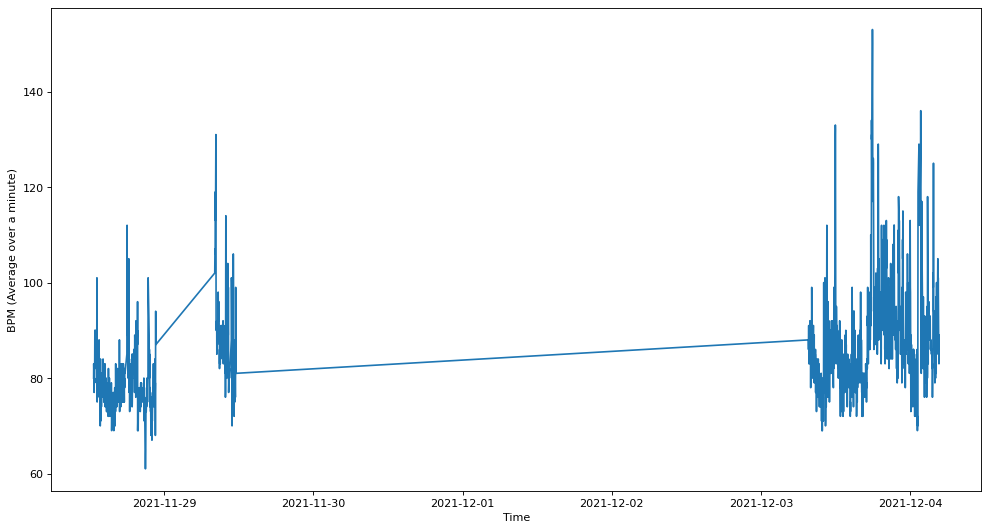

In [8]:
figure(figsize=(15, 8), dpi=80)


plt.xlabel("Time")
plt.ylabel("BPM (Average over a minute)")
plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate'])
#plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate_max'], color='red')
#plt.plot(df_heart_rate_json['start_time'], df_heart_rate_json['heart_rate_min'], color='green')